x0min :  3.3 & x0max : 6.8
x1min :  3.9000000000000004 & x1max : 8.0
175 175


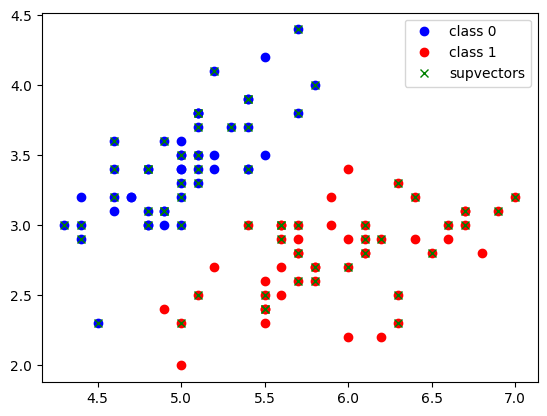

In [122]:
from random import *
from math import *
import matplotlib.pyplot as plt
from numpy import*
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.svm import SVC


iris=load_iris()
iris.feature_names
#print(iris.feature_names)
#print(iris.data)
#print(iris.target)
#print(iris.data)


X=iris.data[iris.target!=2]
Y=iris.target[iris.target!=2]
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2)
#print(X_train.shape)
#print(X_test.shape)

plt.plot(X[Y==0][:,0],X[Y==0][:,1],"ob", label="class 0")
plt.plot(X[Y==1][:,0],X[Y==1][:,1],"or", label="class 1")


"""
plt.plot(X[Y==0][:,2],X[Y==0][:,3],"ob", label="class 0")
plt.plot(X[Y==1][:,2],X[Y==1][:,3],"or", label="class 1")
plt.legend()
plt.show()
"""

SVMmodel=SVC(C=200000,kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)


supvectors=SVMmodel.support_vectors_
# Plot the support vectors here
x0min, x0max=X[Y==0][:,0].min()-1, X[Y==0][:,0].max()+1
x1min, x1max=X[Y==1][:,0].min()-1, X[Y==1][:,0].max()+1
print("x0min : ",x0min, "& x0max :", x0max)
print("x1min : ",x1min, "& x1max :", x1max)
x0=arange(x0min,x0max,0.02)
x1=arange(x1min,x1max,(x1max-x1min)/len(x0))

print(len(x0),len(x1))

#plt.plot(x0,x1,"xg")




#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_


plt.plot(supvectors[:,0],supvectors[:,1],"xg", label="supvectors")


plt.legend()
plt.show()

# SVM for classification

Load IRIS dataset, check its contents:


In [33]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
#print(iris.feature_names)
#print(iris.data[0:5,:])
#print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Split data into training and testing parts:

In [6]:
from sklearn.model_selection import train_test_split

X=iris.data[iris.target!=2]
y=iris.target[iris.target!=2]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)


(80, 4)
(20, 4)


Use a Support Vector Machine for classification:


In [34]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.4

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [ ]:
X=iris.data[iris.target!=2]
y=iris.target[iris.target!=2]

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

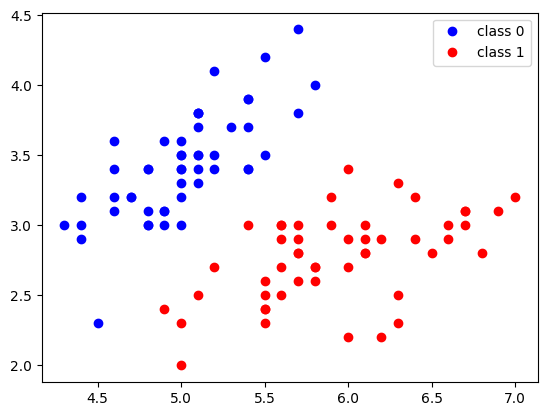

In [51]:
import matplotlib.pyplot as plt
plt.plot(X[Y==0][:,0],X[Y==0][:,1],"ob", label="class 0")
plt.plot(X[Y==1][:,0],X[Y==1][:,1],"or", label="class 1")
plt.legend()
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [100]:
from sklearn.svm import SVC
SVMmodel=SVC(C=200,kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

print(SVMmodel.get_params())

{'C': 200, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

In [124]:
supvectors=SVMmodel.support_vectors_
# Plot the support vectors here
#print(supvectors)


#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_
print(W)

[[ 2.65686168 -0.69837313  0.25911957 -2.47077214]]


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

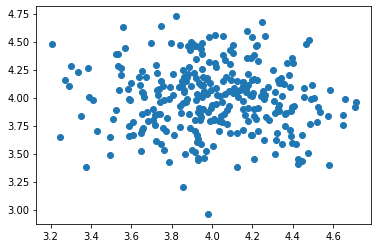

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

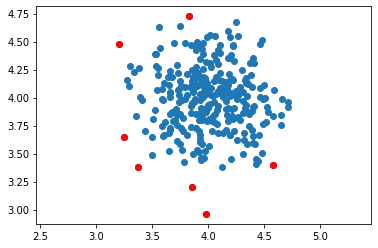

In [ ]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

In [ ]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()

NameError: ignored